In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
df.isnull().sum().sum()

np.int64(0)

In [9]:
df.duplicated().sum()

np.int64(0)

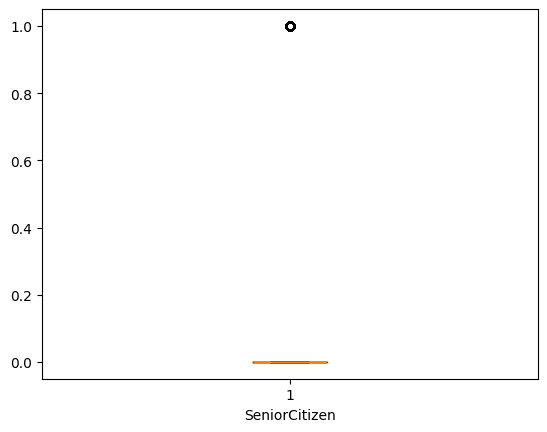

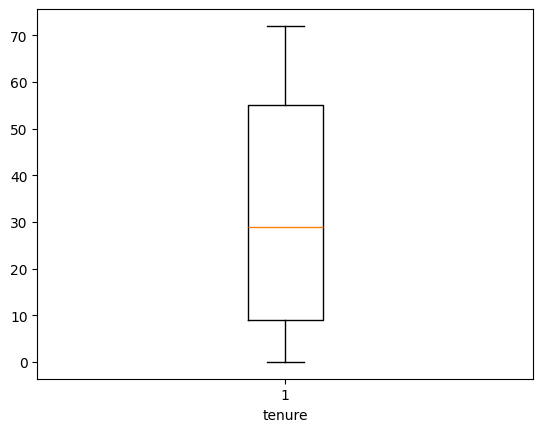

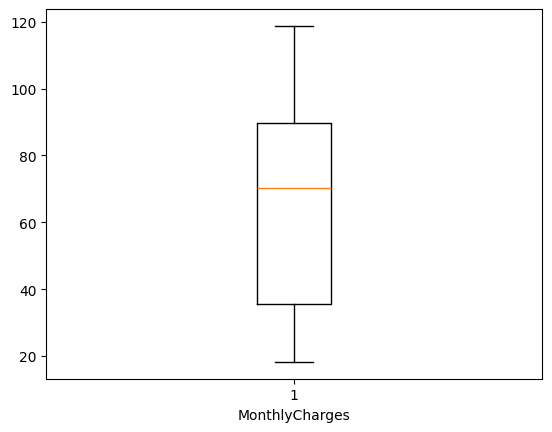

In [10]:
for i in df.columns:
    if (df[i].dtype == 'int64' or df[i].dtype == 'float64'):
        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.show()

In [12]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
# Random Forest are robut to outliers so no need to remove the outliers

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      shape=(6531,), dtype=object)

In [16]:
 df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce') #Whenever we face a unconvertible value we replace it with a null value

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [20]:
df.dropna(inplace = True)

In [21]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [26]:
#We will drop the customer ID column as it is useless to us as it will not help us in any form of prediction and will not help the classifer to predict and causes unnecessary splits and creats confusion.
df.drop('customerID', axis = 1, inplace = True)

In [29]:
# Encoding the dataset

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df.columns:
    if(df[i].dtype == 'object'):
        df[i] = le.fit_transform(df[i])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  
 17  

# Model Building

In [32]:
x = df.iloc[:,:-1]
y = df['Churn']

In [33]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [34]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 42)

# Smote
- Used to handle imbalance
 - S - Synthetic
 - M - Minority
 - O - Oversampling
 - TE - Technique

In [111]:
from imblearn.over_sampling import SMOTE

In [112]:
sm = SMOTE(random_state = 23)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

In [113]:
x_train_sm

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,43,0,1,0,0,0,2,0,2,2,0,1,0,49.050000,2076.200000
1,1,0,0,0,3,1,0,0,0,0,0,0,2,0,0,0,1,53.400000,188.700000
2,0,0,1,0,55,1,2,1,0,0,2,0,0,0,0,1,2,77.750000,4458.150000
3,1,0,1,1,45,1,0,0,2,0,0,2,0,0,2,0,0,54.650000,2553.700000
4,0,0,1,1,55,1,2,1,2,0,0,0,2,2,1,0,3,100.900000,5448.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8255,1,1,0,0,47,1,2,1,0,0,0,0,2,2,0,1,1,100.076062,4710.164881
8256,0,0,0,0,2,1,0,1,0,0,0,0,0,1,0,0,2,82.675596,183.186367
8257,0,0,0,0,35,1,0,0,1,1,0,0,0,0,0,1,1,63.610466,2251.505771
8258,0,0,0,0,23,0,1,0,1,2,1,0,1,1,0,1,1,65.107606,1503.425581


In [114]:
y_train_sm

0       1
1       1
2       1
3       0
4       0
       ..
8255    1
8256    1
8257    1
8258    1
8259    1
Name: Churn, Length: 8260, dtype: int64

In [115]:
print("Before SMOTE")
print(y_train.value_counts())
print("After SMOTE")
print(y_train_sm.value_counts())

Before SMOTE
Churn
0    4130
1    1495
Name: count, dtype: int64
After SMOTE
Churn
1    4130
0    4130
Name: count, dtype: int64


In [116]:
x_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2481,1,1,1,0,61,1,2,2,1,1,1,1,1,1,2,0,0,25.00,1501.75
6784,0,0,0,0,19,1,2,2,1,1,1,1,1,1,0,0,0,24.70,465.85
6125,1,0,1,0,13,1,2,1,0,0,2,0,2,2,0,1,1,102.25,1359.00
3052,1,0,1,0,37,1,2,0,2,0,0,0,0,0,0,1,3,55.05,2030.75
4099,0,0,0,0,6,0,1,0,2,0,0,0,0,0,0,0,0,29.45,161.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,19.05,19.05
5250,1,0,0,0,12,1,2,1,0,0,0,0,2,2,0,0,2,94.55,1173.55
5465,0,0,0,0,26,1,0,0,0,2,2,0,0,0,1,1,3,56.05,1553.20
5851,0,1,0,0,35,1,2,1,2,2,2,2,2,2,1,1,0,110.80,3836.30


In [117]:
y_test

2481    0
6784    0
6125    1
3052    0
4099    0
       ..
1733    0
5250    0
5465    0
5851    0
3984    0
Name: Churn, Length: 1407, dtype: int64

In [118]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
model = RandomForestClassifier(n_estimators = 50, random_state = 23)

In [120]:
model.fit(x_train_sm, y_train_sm)

,n_estimators,50
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [121]:
y_pred = model.predict(x_test)

In [122]:
y_pred

array([0, 1, 1, ..., 0, 0, 0], shape=(1407,))

In [123]:
from sklearn.metrics import *

In [124]:
acc = accuracy_score(y_pred, y_test)
acc

0.7626154939587776

In [126]:
recall = recall_score(y_pred, y_test)
recall

0.5546448087431693

In [127]:
confusion_matrix(y_pred, y_test)

array([[870, 171],
       [163, 203]])

In [129]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1033
           1       0.55      0.54      0.55       374

    accuracy                           0.76      1407
   macro avg       0.70      0.69      0.69      1407
weighted avg       0.76      0.76      0.76      1407



In [106]:
# use n_estimators = [50,100,150,200,250,300,350,400,450,500,550,600,650]

n_estimator = [50,100,150,200,250,300,350,400,450,500,550,600,650]

for i in n_estimator:
    model = RandomForestClassifier(n_estimators = i, random_state = 23)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_pred, y_test)
    print(f'n_estimator = {i} and Accuracy = {acc * 100}')

n_estimator = 50 and Accuracy = 78.67803837953092
n_estimator = 100 and Accuracy = 78.39374555792466
n_estimator = 150 and Accuracy = 79.17555081734187
n_estimator = 200 and Accuracy = 79.38877043354655
n_estimator = 250 and Accuracy = 79.38877043354655
n_estimator = 300 and Accuracy = 79.45984363894812
n_estimator = 350 and Accuracy = 79.317697228145
n_estimator = 400 and Accuracy = 79.1044776119403
n_estimator = 450 and Accuracy = 79.17555081734187
n_estimator = 500 and Accuracy = 79.17555081734187
n_estimator = 550 and Accuracy = 79.24662402274343
n_estimator = 600 and Accuracy = 79.1044776119403
n_estimator = 650 and Accuracy = 79.03340440653874


In [131]:
# Hyperparameter Tuning using GridSearchCV

from sklearn.model_selection import GridSearchCV
new_model = RandomForestClassifier(random_state = 23)
grid_params = {
    'n_estimators' : [100,200,300,400],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [1,5,10,12],
    'min_samples_split' : [2,5,7,9],
    'min_samples_leaf' : [1,2,4,6]
}

gv = GridSearchCV(estimator = new_model, param_grid = grid_params, cv = 3)
# gv.fit(x_train, y_train)